# 1. DATA PREPROCESSING

# a. IMPORT THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy

import seaborn as sns
%matplotlib inline

# b. IMPORT THE DATASET

In [6]:
import os
os.getcwd()

'C:\\Users\\saairaam prasad\\Desktop\\remote internship-2020'

In [8]:
os.chdir('C:/Users/saairaam prasad/Desktop/remote internship-2020/project')
d=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [9]:
d.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [10]:
d.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
d['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [12]:
d['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

# c. TAKING CARE OF MISSING DATA

In [13]:
d.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

# d. NO LABEL ENCODING

In [14]:
x = d.iloc[:,1:8].values
y = d.iloc[:,8].values

In [15]:
x.shape

(500, 7)

# e. ONEHOT ENCODING

In [16]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
z=oh.fit_transform(x[:,2:3]).toarray()
p=oh.fit_transform(x[:,3:4]).toarray()
q=oh.fit_transform(x[:,4:5]).toarray()


C:\Users\saairaam prasad\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\saairaam prasad\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

In [17]:
z

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [18]:
p

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [19]:
q

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [20]:
x.shape

(500, 7)

In [21]:
x=np.delete(x,[2,3,4],axis=1)

In [22]:
x.shape

(500, 4)

In [23]:
x=np.concatenate((q,p,z,x),axis=1)

In [24]:
x.shape

(500, 19)

In [25]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

# f.DATA VISUALISATON

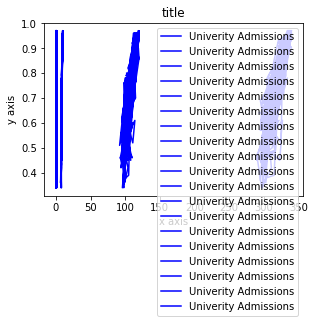

In [26]:
fig=plt.figure()
axes=fig.add_axes([0.4,0.4,0.6,0.6])
axes.plot(x,y,label="Univerity Admissions",color='blue')
axes.set_xlabel("x axis")
axes.set_ylabel("y axis")
axes.set_title("title")
axes.legend(loc='upper right')

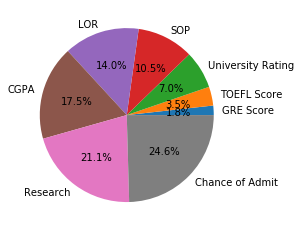

In [27]:
details=["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research","Chance of Admit"]
student=[25,50,100,150,200,250,300,350]
plt.pie(student,labels=details,autopct="%.1f%%")
plt.show()

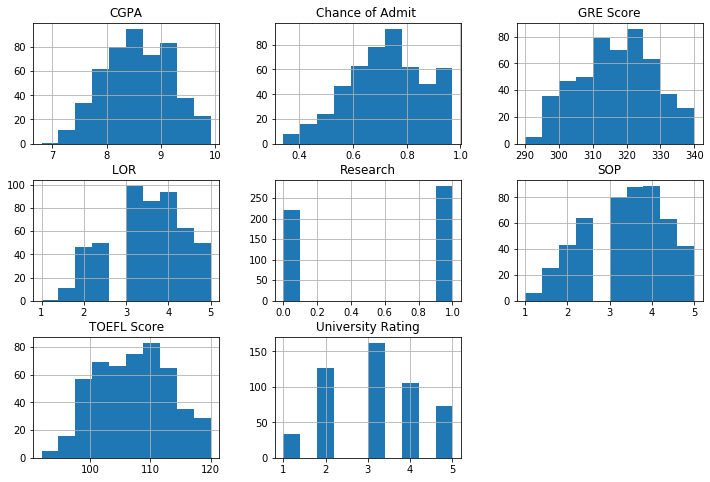

In [28]:
d.pop('Serial No.')
d.hist(figsize=(12,8))
plt.show()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


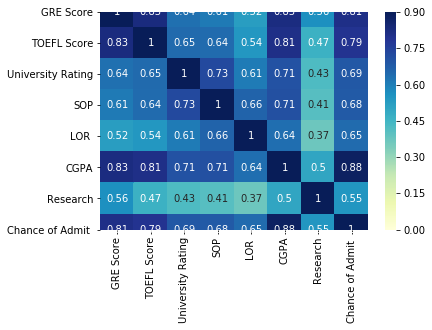

In [29]:
corr=d.corr()
sns.heatmap(corr, vmax=0.9,vmin=0,annot=True,cmap="YlGnBu")
corr


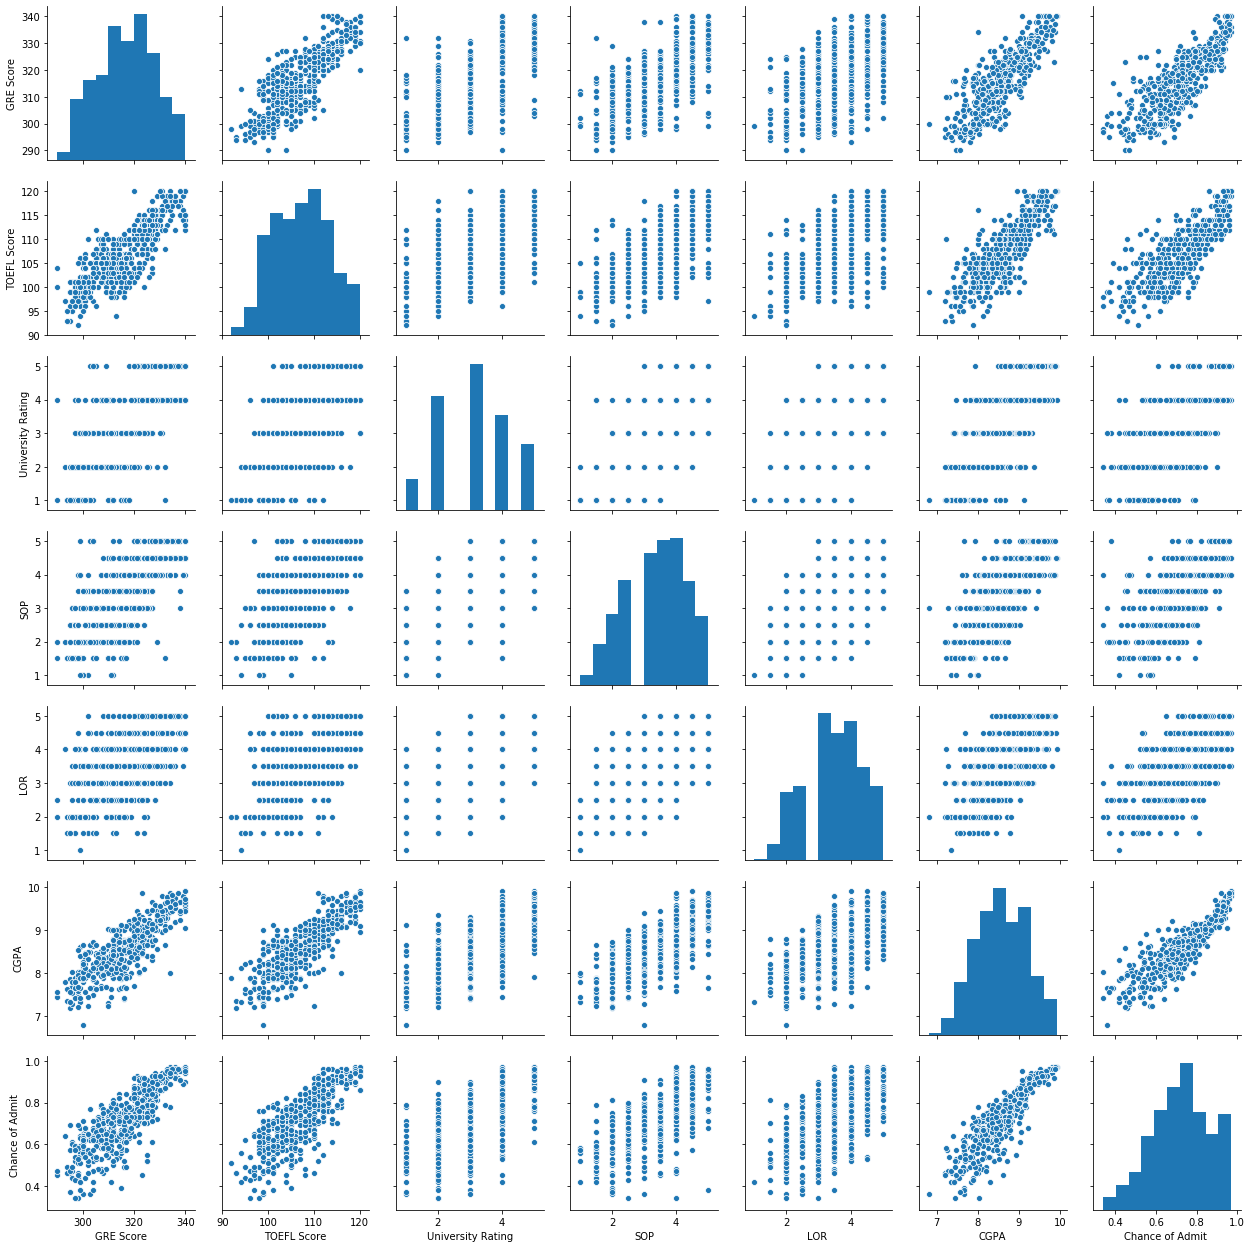

In [30]:
sns.pairplot(d.drop(columns='Research'))

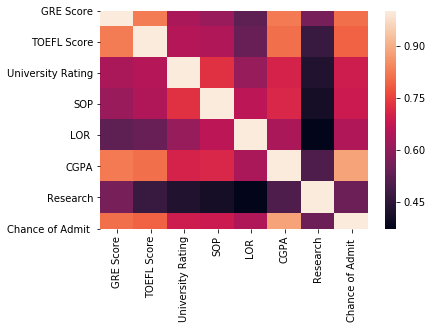

In [31]:
sns.heatmap(d.corr())

In [32]:
d['GRE Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

In [33]:
d.columns.values

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Chance of Admit '], dtype=object)

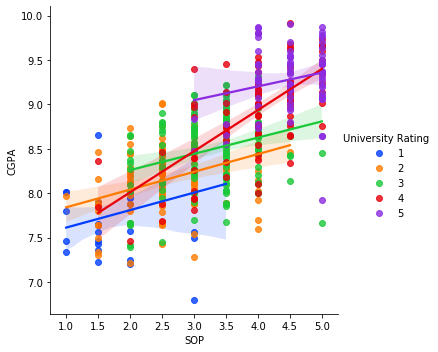

In [28]:
sns.lmplot(x='SOP',y='CGPA',data=d,hue='University Rating',palette='bright')

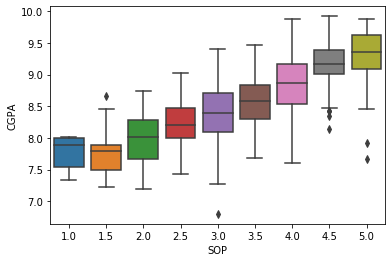

In [29]:
sns.boxplot(x="SOP",y="CGPA",data=d)

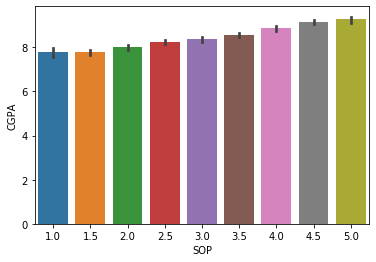

In [30]:
sns.barplot(x='SOP',y='CGPA',data=d)

In [31]:
X = d.drop(['Chance of Admit ','SOP'],axis=1) #SOP dropeed sue to high p-value

In [32]:
X

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,337,118,4,4.5,9.65,1
1,324,107,4,4.5,8.87,1
2,316,104,3,3.5,8.00,1
3,322,110,3,2.5,8.67,1
4,314,103,2,3.0,8.21,0
...,...,...,...,...,...,...
495,332,108,5,4.0,9.02,1
496,337,117,5,5.0,9.87,1
497,330,120,5,5.0,9.56,1
498,312,103,4,5.0,8.43,0


In [33]:
X.shape

(500, 6)

In [34]:
np.array(X)

array([[337.  , 118.  ,   4.  ,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  ,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  ,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  ,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  ,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  ,   4.5 ,   9.04,   0.  ]])

# g. FEATURE SCALING

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
cols=X.columns
array=np.asarray(X[cols])
rs = scaler.fit_transform(array)
rs


array([[4.7       , 4.64285714, 3.75      , 4.375     , 4.56730769,
        5.        ],
       [3.4       , 2.67857143, 3.75      , 4.375     , 3.31730769,
        5.        ],
       [2.6       , 2.14285714, 2.5       , 3.125     , 1.92307692,
        5.        ],
       ...,
       [4.        , 5.        , 5.        , 5.        , 4.42307692,
        5.        ],
       [2.2       , 1.96428571, 3.75      , 5.        , 2.61217949,
        0.        ],
       [3.7       , 3.75      , 3.75      , 4.375     , 3.58974359,
        0.        ]])

In [36]:
X= pd.DataFrame(data=rs,columns=cols)
X.head()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,4.7,4.642857,3.75,4.375,4.567308,5.0
1,3.4,2.678571,3.75,4.375,3.317308,5.0
2,2.6,2.142857,2.50,3.125,1.923077,5.0
3,3.2,3.214286,2.50,1.875,2.996795,5.0
4,2.4,1.964286,1.25,2.500,2.259615,0.0


# h.SPLITTING DATA INTO TRAIN AND TEST

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [38]:
X_train.shape

(350, 6)

In [39]:
X_test.shape

(150, 6)

In [40]:
y_train.shape

(350,)

# 2.MODEL BUILDING

# a. TRAINING AND TESTING



# b.EVALUATION

# linear regression

In [41]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
predictions=reg.predict(X_test)

In [42]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,predictions)

In [43]:
R2

0.8089840729252642

In [44]:
print(f'R-square= {round(R2*100,2)}% ')

R-square= 80.9% 


# Support vector Regressor (svm)

In [45]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train, y_train)
predictions=clf.predict(X_test)
predictions=clf.predict(X_test)
from sklearn.metrics import r2_score
R2=r2_score(y_test,predictions)

print(f'R-square= {round(R2*100,2)}% ')

R-square= 71.48% 


# XGB Regressor

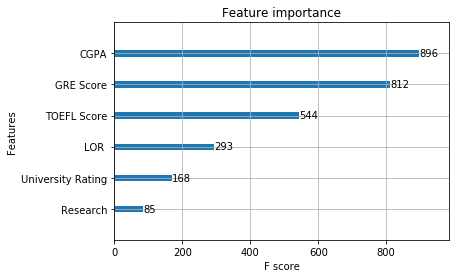

In [46]:
from xgboost import XGBRegressor
XGBreg=XGBRegressor()
XGBreg.fit(X_train,y_train)
xgboost.plot_importance(XGBreg)
plt.show()


In [47]:
predictions=XGBreg.predict(X_test)
from sklearn.metrics import r2_score
R2=r2_score(y_test,predictions)

print(f'R-square= {round(R2*100,2)}% ')

R-square= 71.89% 


# Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(X_train,y_train)
predictions = rfr.predict(X_test) 
from sklearn.metrics import r2_score
R2=r2_score(y_test,predictions)

print(f'R-square= {round(R2*100,2)}% ')

R-square= 75.92% 


In [49]:
import pickle
pickle.dump(clf,open('concrete.pkl','wb'))
model=pickle.load(open('concrete.pkl','rb'))